In [32]:
## Change to the path where you want to save the model, or where you want to load the model from:
ROOT_PATH = '/content/drive/MyDrive/2022 files/CS 577/Assignments/hw1'

# Programming Questions: Q3

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import os
import numpy as np
import tensorflow
from tensorflow import convert_to_tensor as tensor
from tensorflow.keras import optimizers
import keras
from keras import models, layers
import matplotlib.pyplot as plt

In [30]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'

### Loading the data

In [31]:
def load_spam_data(data_url, split_ratio=0.8):
    data = pd.read_csv(data_url, delim_whitespace = False, header=None)
    data = data.sample(frac=1).reset_index(drop=True)
    labels = data.pop(data.columns[-1])
    n_train = int(split_ratio*len(data))
    X_trn, X_tst = np.array(data[:n_train]), np.array(data[n_train:])
    y_trn, y_tst = np.array(labels[:n_train]), np.array(labels[n_train:])
    return (X_trn, y_trn), (X_tst, y_tst)

In [6]:
(X_trn_no_norm, y_trn), (X_tst_no_norm, y_tst) = load_spam_data(URL)

### Normalize

In [33]:
mean_data = np.concatenate([X_trn_no_norm,X_tst_no_norm]).mean(axis=0)
std_data = np.concatenate([X_trn_no_norm,X_tst_no_norm]).std(axis=0)

X_trn = (X_trn_no_norm - mean_data)/std_data
X_tst = (X_tst_no_norm - mean_data)/std_data

### Create a validation set

In [8]:
n_val = int(0.1*X_trn.shape[0])
X_trn_subset = X_trn[n_val:]
y_trn_subset = y_trn[n_val:]
X_val = X_trn[:n_val]
y_val = y_trn[:n_val]

print(f'N = {X_trn_subset.shape[0] + X_tst.shape[0] + X_val.shape[0]}')
print(f'Train values shape: {X_trn_subset.shape}')
print(f'Test values shape:  {X_tst.shape}')
print(f'Val values shape:   {X_val.shape}')
print(f'Train labels shape: {y_trn_subset.shape}')
print(f'Test labels shape:  {y_tst.shape}')
print(f'Val labels shape:   {y_val.shape}')

N = 4601
Train values shape: (3312, 57)
Test values shape:  (921, 57)
Val values shape:   (368, 57)
Train labels shape: (3312,)
Test labels shape:  (921,)
Val labels shape:   (368,)


### Define optimizer, loss function, and metrics

In [34]:
opt     = optimizers.RMSprop(learning_rate=0.01)
loss_f  = keras.losses.binary_crossentropy
metrics = [keras.metrics.binary_accuracy]

### Create, compile, and fit model

In [35]:
draft_model = models.Sequential()
draft_model.add(layers.Dense(16, activation='relu', input_shape=(X_trn_subset.shape[1],)))
draft_model.add(layers.Dense(1,  activation='sigmoid'))

draft_model.compile(optimizer = opt, loss = loss_f, metrics = metrics)

draft_history = draft_model.fit(X_trn_subset, 
                                y_trn_subset, 
                                epochs=50, 
                                batch_size=8, 
                                validation_data = (X_val,y_val))

Epoch 1/50
414/414 [==============================] - 2s 3ms/step - loss: 0.2431 - binary_accuracy: 0.9206 - val_loss: 0.2175 - val_binary_accuracy: 0.9185
Epoch 2/50
414/414 [==============================] - 1s 3ms/step - loss: 0.2023 - binary_accuracy: 0.9345 - val_loss: 0.2056 - val_binary_accuracy: 0.9185
Epoch 3/50
414/414 [==============================] - 1s 3ms/step - loss: 0.1891 - binary_accuracy: 0.9417 - val_loss: 0.1976 - val_binary_accuracy: 0.9130
Epoch 4/50
414/414 [==============================] - 1s 3ms/step - loss: 0.1819 - binary_accuracy: 0.9457 - val_loss: 0.2012 - val_binary_accuracy: 0.9185
Epoch 5/50
414/414 [==============================] - 1s 3ms/step - loss: 0.1823 - binary_accuracy: 0.9493 - val_loss: 0.1884 - val_binary_accuracy: 0.9158
Epoch 6/50
414/414 [==============================] - 1s 3ms/step - loss: 0.1753 - binary_accuracy: 0.9469 - val_loss: 0.2083 - val_binary_accuracy: 0.9212
Epoch 7/50
414/414 [==============================] - 1s 3ms/ste

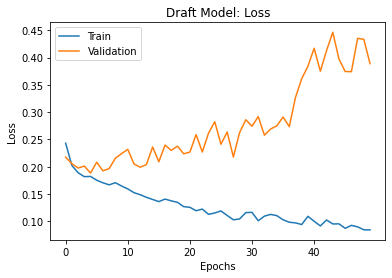

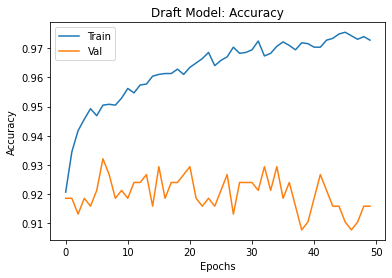

In [36]:
epochs           = draft_history.params['epochs']
train_loss_draft = draft_history.history['loss']
train_acc_draft  = draft_history.history['binary_accuracy']
val_loss_draft   = draft_history.history['val_loss']
val_acc_draft    = draft_history.history['val_binary_accuracy']

plt.plot(range(epochs),train_loss_draft,label='Train')
plt.plot(range(epochs),val_loss_draft,label='Validation')
plt.xticks(range(epochs)[0::10])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Draft Model: Loss')
plt.show()

plt.plot(range(epochs),train_acc_draft,label='Train')
plt.plot(range(epochs),val_acc_draft,label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Draft Model: Accuracy')
plt.show()

In [42]:
opt     = optimizers.RMSprop(learning_rate=0.001)
loss_f  = keras.losses.binary_crossentropy
metrics = [keras.metrics.binary_accuracy]

final_model = models.Sequential()
final_model.add(layers.Dense(32, activation='relu', input_shape=(X_trn.shape[1],)))
final_model.add(layers.Dense(1,  activation='sigmoid'))

final_model.compile(optimizer = opt, loss = loss_f, metrics = metrics)

final_history = final_model.fit(X_trn, 
                                y_trn, 
                                epochs=25, 
                                batch_size=32,
                                validation_data = (X_val,y_val))

Epoch 1/25
115/115 [==============================] - 1s 4ms/step - loss: 0.4784 - binary_accuracy: 0.8041 - val_loss: 0.3362 - val_binary_accuracy: 0.8723
Epoch 2/25
115/115 [==============================] - 0s 3ms/step - loss: 0.2790 - binary_accuracy: 0.9111 - val_loss: 0.2568 - val_binary_accuracy: 0.9130
Epoch 3/25
115/115 [==============================] - 0s 3ms/step - loss: 0.2285 - binary_accuracy: 0.9272 - val_loss: 0.2281 - val_binary_accuracy: 0.9158
Epoch 4/25
115/115 [==============================] - 0s 3ms/step - loss: 0.2083 - binary_accuracy: 0.9312 - val_loss: 0.2125 - val_binary_accuracy: 0.9185
Epoch 5/25
115/115 [==============================] - 0s 3ms/step - loss: 0.1968 - binary_accuracy: 0.9370 - val_loss: 0.2046 - val_binary_accuracy: 0.9212
Epoch 6/25
115/115 [==============================] - 0s 3ms/step - loss: 0.1878 - binary_accuracy: 0.9359 - val_loss: 0.1982 - val_binary_accuracy: 0.9239
Epoch 7/25
115/115 [==============================] - 0s 3ms/ste

##### Included validation set in updated model to make sure overfitting was not occuring after making changes

29/29 [==============================] - 0s 2ms/step - loss: 0.1814 - binary_accuracy: 0.9403


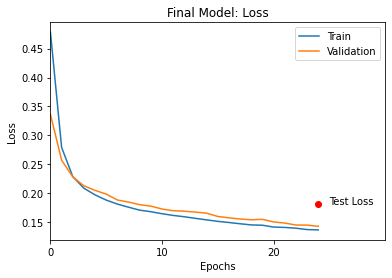


Final train loss: 0.13618
Final test loss:  0.18138



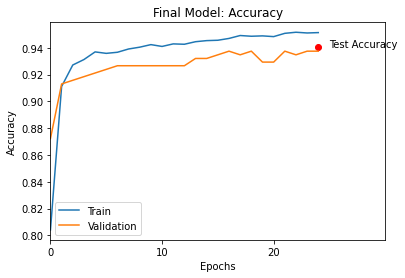


Final train accuracy: 0.95136
Final test accuracy:  0.94028


In [43]:
epochs     = final_history.params['epochs']
train_loss = final_history.history['loss']
train_acc  = final_history.history['binary_accuracy']
val_loss   = final_history.history['val_loss']
val_acc    = final_history.history['val_binary_accuracy']

test_results = final_model.evaluate(X_tst,y_tst,return_dict=True);

test_loss = test_results['loss']
test_acc  = test_results['binary_accuracy']

plt.plot(range(epochs),train_loss,label='Train')
plt.plot(range(epochs),val_loss,label='Validation')
plt.scatter([epochs-1],[test_loss],color='red')
plt.annotate("Test Loss", (epochs, test_loss),color='black')
plt.xticks(range(epochs)[0::10])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(epochs)[0::10])
plt.xlim(0,epochs+5)
plt.legend()
plt.title('Final Model: Loss')
plt.show()
print()
print(f'Final train loss: {round(train_loss[-1],5)}')
print(f'Final test loss:  {round(test_loss,5)}')
print()

plt.plot(range(epochs),train_acc,label='Train')
plt.plot(range(epochs),val_acc,label='Validation')
plt.scatter([epochs-1],[test_acc],color='red')
plt.annotate("Test Accuracy", (epochs, test_acc),color='black')
plt.xticks(range(epochs)[0::10])
plt.xlim(0,epochs+5)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Final Model: Accuracy')
plt.show()
print()
print(f'Final train accuracy: {round(train_acc[-1],5)}')
print(f'Final test accuracy:  {round(test_acc,5)}')

In [44]:
print(f'Training loss at epoch=25:')
print(f'    Initial model: {round(train_loss_draft[-1],5)}')
print(f'    Final model:   {round(train_loss[-1],5)}')
print(f'    Change:        {round(100*((train_loss[-1] - train_loss_draft[-1])/train_loss_draft[-1]),3)}%')
print()
print(f'Training accuracy at epoch=25:')
print(f'    Initial model: {round(100*train_acc_draft[-1],5)}%')
print(f'    Final model:   {round(100*train_acc[-1],5)}%')
print(f'    Change:        {round(100*((train_acc[-1] - train_acc_draft[-1])/train_acc_draft[-1]),3)}%')
print()
print(f'Validation loss at epoch=25:')
print(f'    Initial model: {round(val_loss_draft[-1],5)}')
print(f'    Final model:   {round(val_loss[-1],5)}')
print(f'    Change:        {round(100*((val_loss[-1] - val_loss_draft[-1])/val_loss_draft[-1]),5)}%')
print()
print(f'Validation accuracy at epoch=25:')
print(f'    Initial model: {round(100*val_acc_draft[-1],5)}%')
print(f'    Final model:   {round(100*val_acc[-1],5)}%')
print(f'    Change:        {round(100*(val_acc[-1] - val_acc_draft[-1])/val_acc_draft[-1],5)}%')

Training loss at epoch=25:
    Initial model: 0.0843
    Final model:   0.13618
    Change:        61.539%

Training accuracy at epoch=25:
    Initial model: 97.28261%
    Final model:   95.13587%
    Change:        -2.207%

Validation loss at epoch=25:
    Initial model: 0.38894
    Final model:   0.14243
    Change:        -63.37994%

Validation accuracy at epoch=25:
    Initial model: 91.57609%
    Final model:   93.75%
    Change:        2.37389%


In [45]:
predictions = final_model.predict(X_tst)
predictions = np.asarray([int(np.round(p,0)[0]) for p in predictions])
prediction_results = pd.DataFrame({'Predicted':list(predictions),'Actual':list(y_tst)})

print('Sample predictions compared to ground truth:')
display(prediction_results[:10])

print(f'Final model test loss:         {round(test_loss,5)}')
print(f'Final model test accuracy:     {round(100*test_acc,5)}%')

Sample predictions compared to ground truth:


,Predicted,Actual
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
5,1,1
6,0,0
7,1,1
8,0,0
9,0,0


Final model test loss:         0.18138
Final model test accuracy:     94.02823%


In [46]:
final_model.save(os.path.join(ROOT_PATH, 'Q3_model.h5'))
best_model = tensorflow.keras.models.load_model(os.path.join(ROOT_PATH, 'Q3_model.h5'))